In [1]:
import numpy as np
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import math
import openpyxl
from statistics import * 
from cycler import cycler
import scipy
import scipy.stats
from gcplot import gc
import importlib
from collections import Counter
from datetime import datetime
import os
from openpyxl import load_workbook

Note: If changes are made to the `gc` module, you need to add the following line to the cell you are working in to ensure those changes are reflected in this notebook. Simply re-importing the module will not work.

    importlib.reload(gc)

### Step 1: Enter file information here
- Populate `file_list` with names of files in *chronological order* (newest first). If samples with the same names are detected, the samples in the newest files will override the samples in older files.    
- Populate `sheet` with the name of the Excel sheet containing the corrected concentration data. This name should be the same across all Excel files.
- Populate `remove_sample_list` and `remove_product_list` with names of samples and products that should be disregarded from all files (if desired).  Otherwise, leave as empty list(s).

In [3]:
file_list = [
    'GCData_R227X w Conc Data - July 2021.xlsx',
    'GCData_BTE_variants w Conc Data - June 2021.xlsx',
    'GCData_BTE_variants w Conc Data - May 2021.xlsx',
    'GCData_LP_FAME w Conc Data - Apr 2021.xlsx',
    'GCData_Acid_FAME w Conc Data - Feb 2021.xlsx',
    'GCData_Jan_2021 w Conc Data - Jan 2021.xlsx',
    'GCData_KCM_mutants-R2 w Conc Data - Dec 2020.xlsx',
    'GCData_M133X w Conc Data - Dec 2020.xlsx',
    'GCData_mutants-Nov19-ext_std_refined w Conc Data - Nov 2020.xlsx',
    'GCData-AM_mutantsKCM2 w Conc Data.xlsx',
    'GCData-AM_mutantsKCM1 w Conc Data.xlsx',
    'GCData-AM_mutants15-16 w Conc Data.xlsx',
    'GCData-AM_mutants1-9 w Conc Data - Aug 2020.xlsx',
    'GCData-SSM_mutants5-8 w Conc Data.xlsx',
    'GCData-SSM_mutants1-4 w Conc Data.xlsx',
]

sheet = 'Corrected Concentration'

remove_sample_list = ['BTE-QE', 'BTE_AW', 'BTE_BP_Mut', 'BTE_WT', 'FAME', 'WT', 'WT_A', 'Neg', 'Neg_A','Rec']#, 'BTE', ]
remove_product_list = ['C17:cp']

- Run `gc.load_data` to get the corrected concentration data from each Excel file. 
- Set the `output` option to **`True`** to see which products and samples were detected from each file, or set to **`False`** to hide output.
  - The products and samples in <span style="color:#ba4046">red</span> are those that were removed from the dataframe as specified by `remove_product_list` and `remove_sample_list`, respectively.
  - The samples in <span style="color:#b5821b">yellow</span> are duplicates that have been overridden by a higher priority file.
  - The samples in <span style="color:#2e8d4e">green</span> are those that will have their data included in the analysis and visualiziation.

In [45]:
importlib.reload(gc)
master_df, master_sample_list, df_dict = gc.load_data(file_list, sheet, remove_sample_list, remove_product_list, output = True)

GCData_R227X w Conc Data - July 2021.xlsx
Detected products:      ['C8', 'C10:1', 'C10', 'C12:1', 'C12', 'C14:1', 'C14', 'C16:1', 'C16', 'C18:1', 'C18']
Detected sample groups: ['BTE', 'BTE_AW', 'H204A', 'M133L_M222K_R227H', 'M133L_M222K_R227H_AW', 'R227A', 'R227D', 'R227F', 'R227H', 'Rec']
GCData_BTE_variants w Conc Data - June 2021.xlsx
Detected products:      ['C8', 'C10:1', 'C10', 'C12:1', 'C12', 'C14:1', 'C14', 'C16:1', 'C16', 'C18:1', 'C18']
Detected sample groups: ['BTE', 'H204A', 'KCM2', 'KCM250', 'KCM280', 'KCM3', 'KCM35', 'KCM7', 'Rec']
GCData_BTE_variants w Conc Data - May 2021.xlsx
Detected products:      ['C8', 'C10:1', 'C10', 'C12:1', 'C12', 'C14:1', 'C14', 'C16:1', 'C16', 'C18:1', 'C18']
Detected sample groups: ['BTE', 'BTE_M133F_M222K', 'BTE_M222K_R227H']
GCData_LP_FAME w Conc Data - Apr 2021.xlsx
Detected products:      ['C8', 'C10:1', 'C10', 'C12:1', 'C12', 'C14:1', 'C14', 'C16:1', 'C16', 'C18:1', 'C18']
Detected sample groups: ['BTE_WT', 'H204A', 'BTE_LP_Mut', 'BTE_B

### Step 2: Enter plotting information here
- Populate `samples` with names of samples in the order you wish to plot data for. Set to **`None`** to plot all data.    
- Populate `chains` with the names of the products in the order you wish to plot data for. Set to **`None`** to plot all products in the default order (alphanumeric).   

In [46]:
samples = ['BTE', 'H204A', 'M133L_M222K_R227H', 'M133L_M222K_R227H_AW', 'R227A', 'R227D', 'R227F', 'R227H', 'KCM2', 'KCM250', 'KCM280', 'KCM3', 'KCM35', 'KCM7']
chains = ['C8', 'C10:1', 'C10', 'C12:1', 'C12', 'C14:1', 'C14', 'C16:1', 'C16', 'C18:1', 'C18']

In [40]:
len(master_df['Sample Group'].unique())

65

- Enter plot formatting options here

In [49]:
title = 'Free fatty acid distribution of ClFatB3 variants' #graph title
ylabel = 'mg/L FAME' #y axis label
graphWidth = len(samples) #Default 6.0
graphHeight = 4 #Default 4.0
barWidth = 0.6 #Default 0.8
legendLocation = 'upper left' #Default 'best' or Choose: 'upper right/center/left', 'lower right/center/left'
plotDistribution = False

csfont = {'fontname':'Times New Roman'}
colorwheel = ('olivedrab', 'orange', 'orange', 'indianred','indianred','blueviolet','blueviolet','palevioletred','palevioletred','skyblue','skyblue')
plt.rcParams.update({'font.size': 14})
plt.rcParams['axes.prop_cycle'] = cycler(color=colorwheel)

### Python Default
#plt.rcParams["font.family"] = 'DejaVu Sans'

### Step 3: Analyze and visualize data

In [50]:
df_mean, df_scaled, df_err = gc.dataParse(master_df, samples, chains)
summary_stats = gc.summary_stats(master_df, samples, chains)

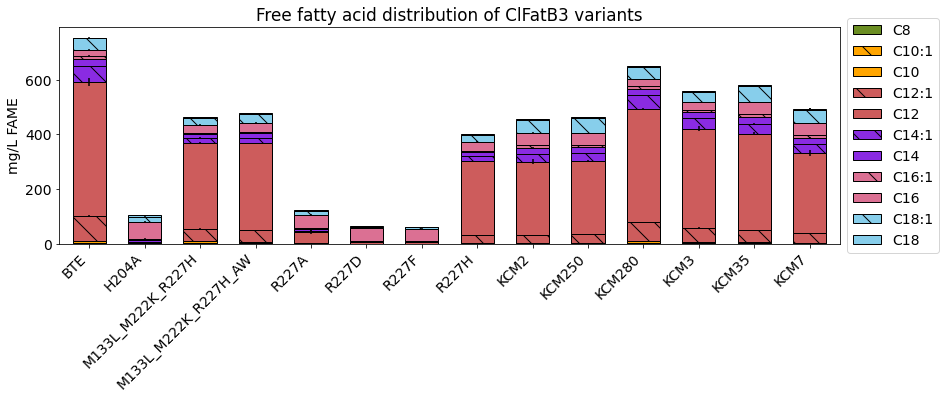

In [51]:
fig, axs = plt.subplots(1, 1, figsize = (graphWidth, graphHeight))
df_mean.plot.bar(ax = axs, stacked=True, edgecolor = 'k', width = barWidth, yerr = df_err, title = title)

# After plotting, set the hatches such that the hatch pattern alternates
gc.set_hatch(axs, df_mean.columns)

# Plot formatting
plt.setp(axs.get_xticklabels(), rotation=45, ha='right')
axs.set_ylabel(ylabel)
axs.set_xlabel('')
# Show plot legend
axs.legend(bbox_to_anchor = [1,.5], loc='center left');
plt.show()

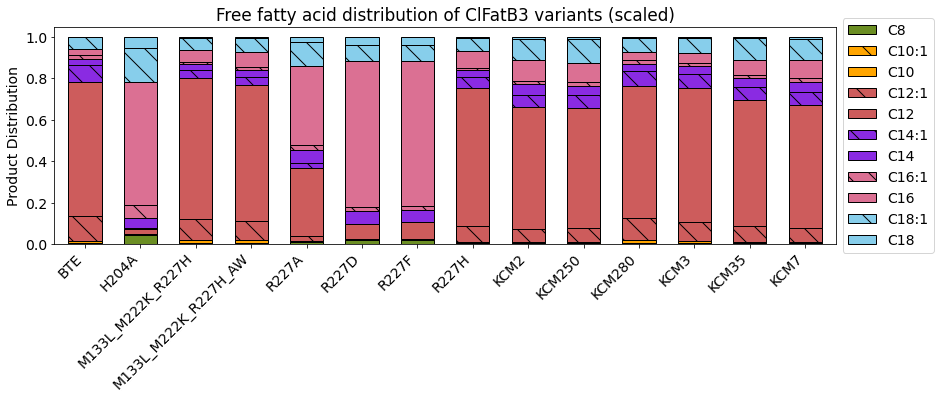

In [52]:
fig, axs = plt.subplots(1, 1, figsize = (graphWidth, graphHeight))

df_scaled.plot.bar(ax = axs, stacked=True, edgecolor = 'k', width = barWidth, title = title + ' (scaled)')

# After plotting, set the hatches such that the hatch pattern alternates
gc.set_hatch(axs, df_scaled.columns)

# Plot formatting
plt.setp(axs.get_xticklabels(), rotation=45, ha='right')
axs.set_ylabel('Product Distribution')
axs.set_xlabel('')
# Show plot legend
axs.legend(bbox_to_anchor = [1,.5], loc='center left');
plt.show()

In [57]:
df_scaled.T.iloc[::-1]

Sample Group,BTE,H204A,M133L_M222K_R227H,M133L_M222K_R227H_AW,R227A,R227D,R227F,R227H,KCM2,KCM250,KCM280,KCM3,KCM35,KCM7
Products,,,,,,,,,,,,,,
C18,0.001575,0.050911,0.005268,0.006174,0.025245,0.036895,0.036422,0.006709,0.008672,0.008490,0.003904,0.004892,0.006586,0.007818
C18:1,0.055429,0.164591,0.055739,0.067619,0.117173,0.078652,0.078346,0.058731,0.103591,0.116708,0.068176,0.070333,0.102841,0.102125
C16,0.030143,0.595764,0.061961,0.072210,0.379278,0.706936,0.700381,0.084158,0.097985,0.092309,0.040954,0.051326,0.072576,0.087351
C16:1,0.016922,0.063315,0.009252,0.011375,0.023367,0.017146,0.018580,0.008792,0.018331,0.017988,0.015615,0.012491,0.016938,0.017865
C14,0.032679,0.049559,0.028721,0.033710,0.063025,0.063083,0.061199,0.035942,0.050045,0.045124,0.035913,0.039311,0.043186,0.049285
C14:1,0.078529,0.002503,0.039372,0.040583,0.023623,0.000000,0.000000,0.050880,0.060919,0.063806,0.073629,0.068195,0.062982,0.064028
C12,0.649156,0.025768,0.677865,0.659109,0.331040,0.074261,0.081476,0.669774,0.589484,0.577770,0.637057,0.647546,0.608845,0.592344
C12:1,0.118796,0.000000,0.101013,0.090402,0.023386,0.000000,0.000000,0.074605,0.062174,0.067458,0.107118,0.092287,0.074369,0.069746
C10,0.011830,0.003353,0.015069,0.013367,0.004941,0.005186,0.005701,0.007353,0.005851,0.006638,0.012585,0.009290,0.007769,0.006468


### Step 4: Write summary table to Excel file
- Set `save_to_file` and `save_to_sheet` to the file name and sheet name you wish to save the dataframe to, respectively.
- To save to a new sheet in an existing summary file, set `save_to_file` to the name of the existing file and set `save_to_sheet` to a new sheet name, otherwise data in the existing sheet will be overwritten.
- Set the `replace` option to **`True`** to replace an existing Excel file.

In [28]:
save_to_file = 'Summary Statistics.xlsx'
save_to_sheet = 'Table1'
gc.save_df_to_excel(summary_stats, save_to_file, save_to_sheet, replace = False) 

The sheet name 'Table1' already exists in Summary Statistics.xlsx.
Existing data in 'Table1' will be replaced with new data. Proceed? Yes/No: No
Operation cancelled.
